In [1]:
import pandas as pd
import numpy as np
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
#Import file
df_file_path = 'GeneralEsportData.csv'
df = pd.read_csv(df_file_path, encoding='cp1252')

In [3]:
df.describe

<bound method NDFrame.describe of                                              Game  ReleaseDate  \
0                                  Age of Empires         1997   
1                               Age of Empires II         1999   
2                              Age of Empires III         2005   
3                               Age of Empires IV         2021   
4                           Age of Empires Online         2011   
..                                            ...          ...   
553                Gears of War: Ultimate Edition         2015   
554                                 Knockout City         2021   
555  Mobile Suit Gundam: Extreme Vs Maxi Boost ON         2016   
556                                 Rogue Company         2020   
557                                The Division 2         2019   

                    Genre  TotalEarnings  OnlineEarnings  TotalPlayers  \
0                Strategy      191181.81       156839.89           261   
1                Strategy

In [4]:
df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17


In [5]:
#Add in person earnings column
in_person_earnings = df['TotalEarnings'] - df['OnlineEarnings']

df['InPersonEarnings'] = in_person_earnings

df.head()

,Game,ReleaseDate,Genre,TotalEarnings,OnlineEarnings,TotalPlayers,TotalTournaments,InPersonEarnings
0,Age of Empires,1997,Strategy,191181.81,156839.89,261,99,34341.92
1,Age of Empires II,1999,Strategy,2296502.80,720999.87,1528,1140,1575502.93
2,Age of Empires III,2005,Strategy,93913.65,41800.00,139,120,52113.65
3,Age of Empires IV,2021,Strategy,151091.75,217.00,248,79,150874.75
4,Age of Empires Online,2011,Strategy,5356.56,775.00,25,17,4581.56


In [6]:
#Aggregate games over genre
df_revbar = df[['OnlineEarnings', 'InPersonEarnings', 'Genre']]

df_revbar = df_revbar.groupby(['Genre']).agg(sum).reset_index()

df_revbar = df_revbar.set_index('Genre')

df_revbar.head()

,OnlineEarnings,InPersonEarnings
Genre,,
Battle Royale,1.032892e+08,98744293.77
Collectible Card Game,2.899262e+07,12619866.59
Fighting Game,2.120143e+07,2601984.69
First-Person Shooter,1.981468e+08,98822828.46
Multiplayer Online Battle Arena,4.001939e+08,45780714.45


Text(0.5, 1.0, 'Esports Genre vs Earnings')

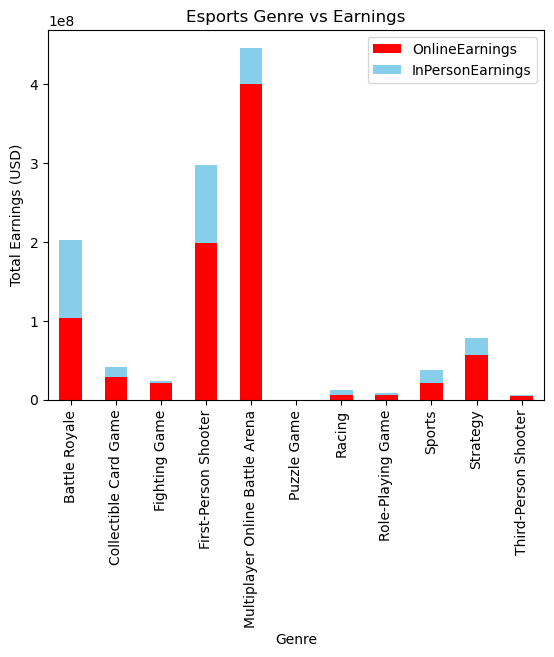

In [7]:
#Graph the data
df_revbar.plot(kind='bar', stacked=True, color=['red', 'skyblue'])

plt.xlabel('Genre')
plt.ylabel('Total Earnings (USD)')
plt.title('Esports Genre vs Earnings')

In [17]:
#Caluculate scaler for percent of total earnings
tot_earn = df_revbar['InPersonEarnings'] + df_revbar['OnlineEarnings']

df_revbar['TotalEarnings'] = tot_earn

big_total = sum(df_revbar['TotalEarnings'])

1152059216.94

In [18]:
percent_earn = df_revbar['TotalEarnings'] / big_total
percent_earn

Genre
Battle Royale                      0.175367
Collectible Card Game              0.036120
Fighting Game                      0.020662
First-Person Shooter               0.257773
Multiplayer Online Battle Arena    0.387111
Puzzle Game                        0.000063
Racing                             0.010405
Role-Playing Game                  0.007301
Sports                             0.033075
Strategy                           0.067339
Third-Person Shooter               0.004785
Name: TotalEarnings, dtype: float64

Game vs Earnings

In [9]:
#Subset of the dataframe
genre_df = df.loc[df['Genre'] == 'Battle Royale']

In [10]:
#Taking desired columns and reseting index
genre_df = genre_df.reset_index()
genre_df = genre_df[['OnlineEarnings', 'InPersonEarnings', 'Game']]
genre_df = genre_df.set_index('Game')

Text(0.5, 1.0, 'Game vs Earnings for BattleRoyale')

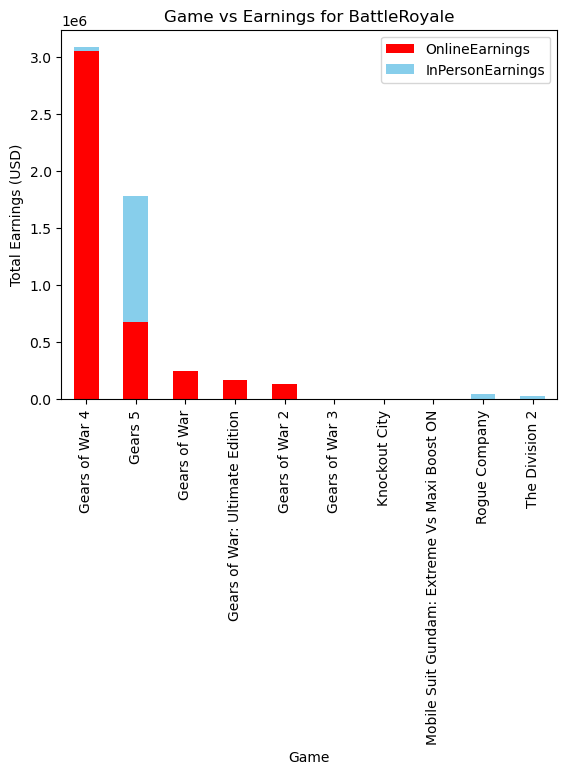

In [32]:
#Graph it
genre_df.sort_values(by=['OnlineEarnings'], ascending=False).plot(kind='bar', stacked=True, color=['red', 'skyblue'])


plt.xlabel('Game')
plt.ylabel('Total Earnings (USD)')
plt.title('Game vs Earnings for {genre}'.format(genre='BattleRoyale'))

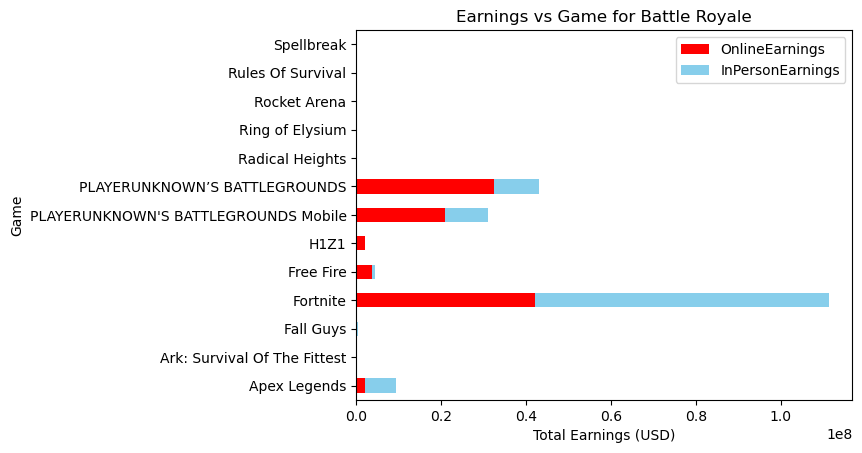

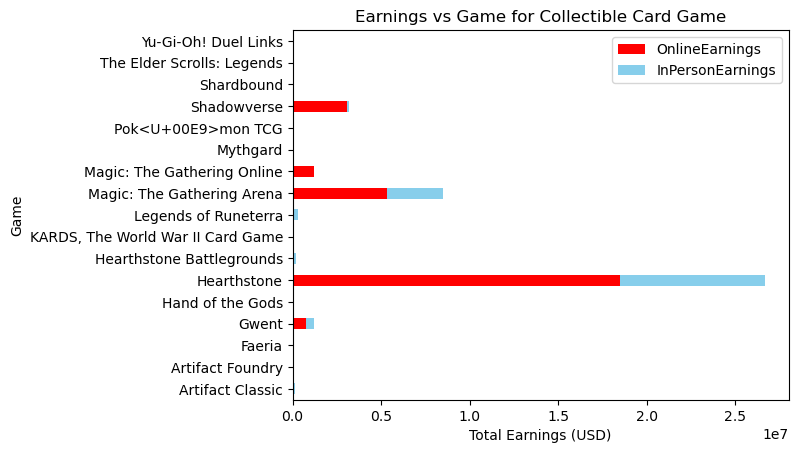

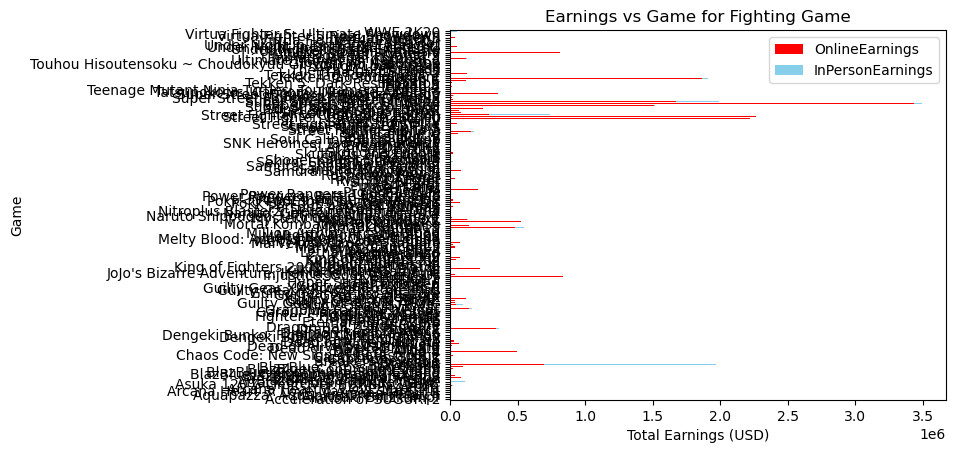

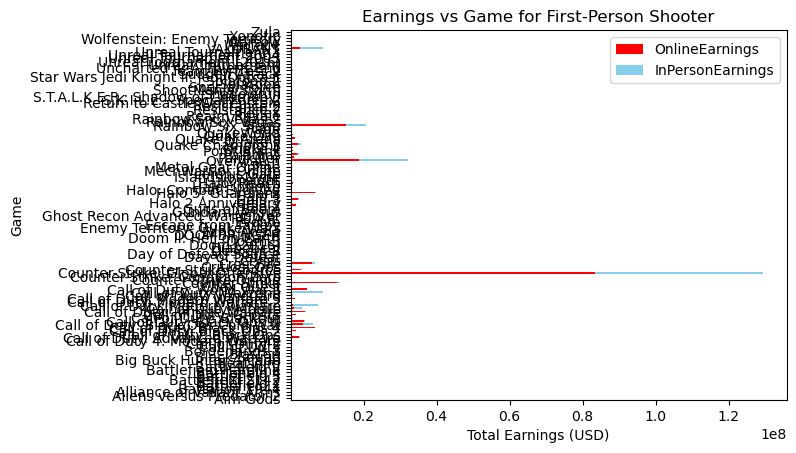

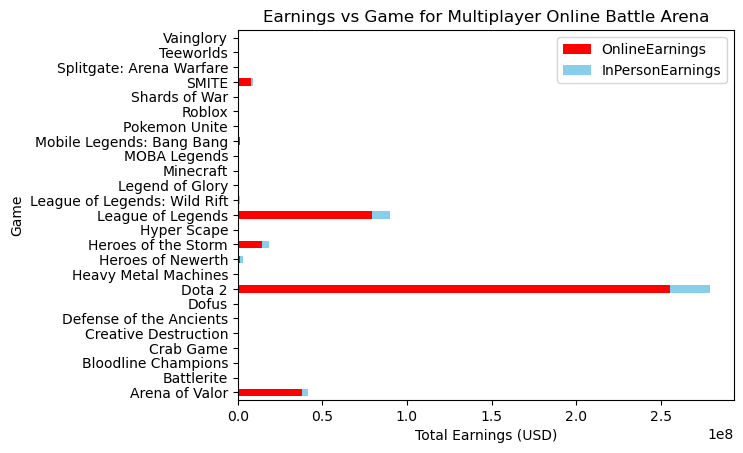

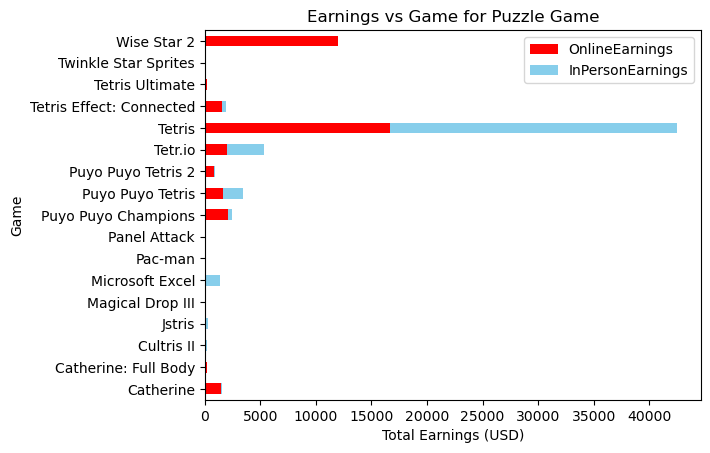

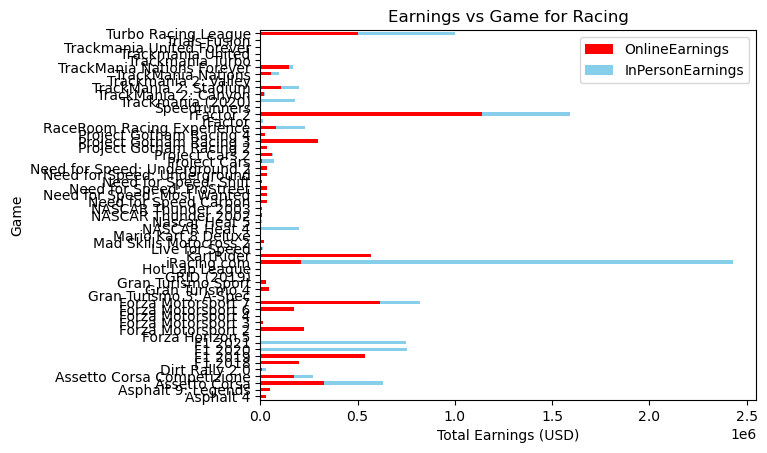

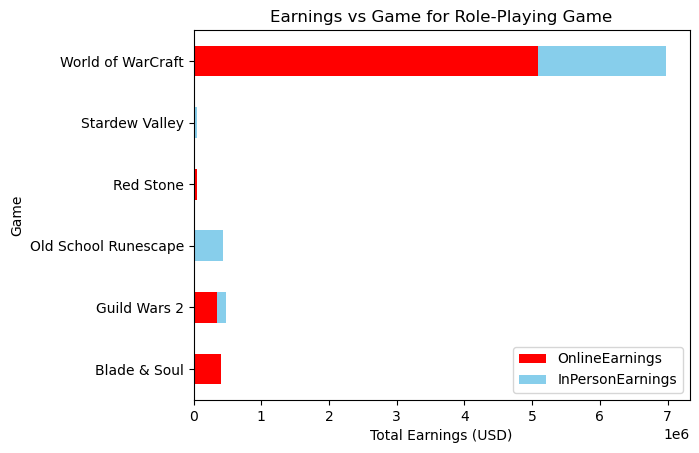

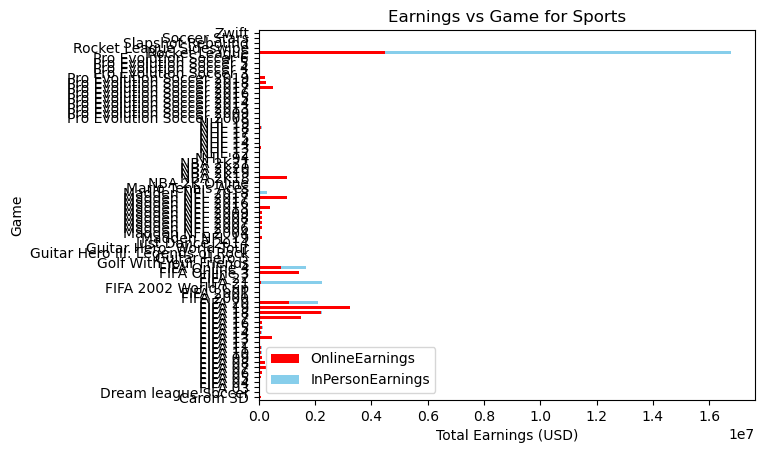

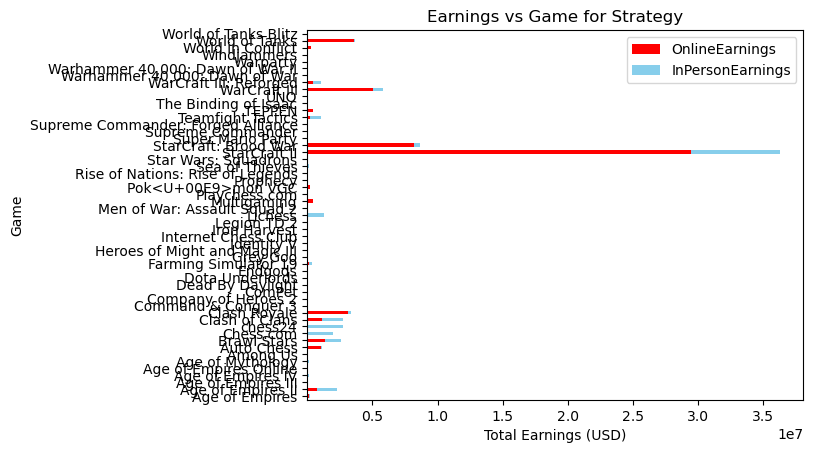

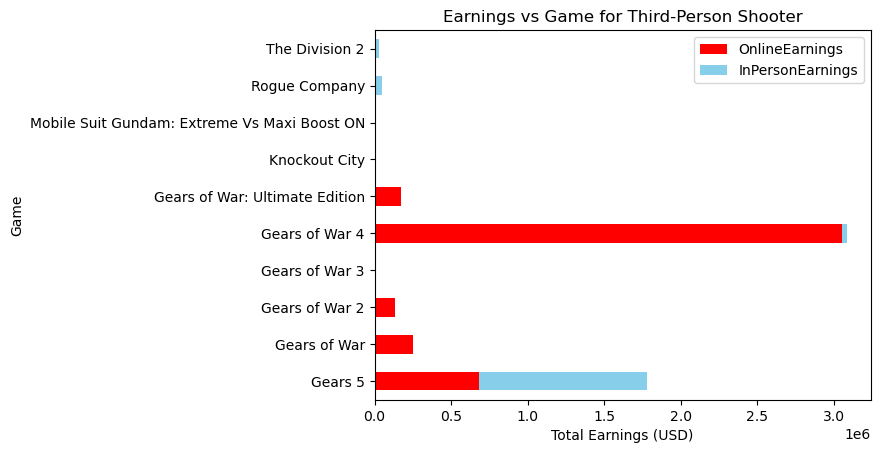

In [26]:
#Recall we smashed the data frame by genre
genre_list = df_revbar.index

#Loop to make game vs earnings graph for each genre
for genre in genre_list:
    genre_df = df.loc[df['Genre'] == genre]
    genre_df = genre_df.reset_index()
    genre_df = genre_df[['OnlineEarnings', 'InPersonEarnings', 'Game']]
    genre_df = genre_df.set_index('Game')
    
    genre_df.plot.barh(stacked=True, color=['red', 'skyblue'])

    plt.xlabel('Total Earnings (USD)')
    plt.ylabel('Game')
    plt.title('Earnings vs Game for {g}'.format(g=genre))
    

In [34]:
help(plt.subplots)

Help on function subplots in module matplotlib.pyplot:

subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)
    Create a figure and a set of subplots.
    
    This utility wrapper makes it convenient to create common layouts of
    subplots, including the enclosing figure object, in a single call.
    
    Parameters
    ----------
    nrows, ncols : int, default: 1
        Number of rows/columns of the subplot grid.
    
    sharex, sharey : bool or {'none', 'all', 'row', 'col'}, default: False
        Controls sharing of properties among x (*sharex*) or y (*sharey*)
        axes:
    
        - True or 'all': x- or y-axis will be shared among all subplots.
        - False or 'none': each subplot x- or y-axis will be independent.
        - 'row': each subplot row will share an x- or y-axis.
        - 'col': each subplot column will share an x- or y-axis.
    
        When subplots 